In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

In [23]:
columns  = ["sentiment", "ids", "date", "flag", "user", "text"]
df = pd.read_csv('twiter140.csv', encoding = "ISO-8859-1", names=columns)

In [24]:
df.head(5)


,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [25]:
data = df[['text', 'sentiment']].copy()

### sentiment labels ratio

In [26]:
data.groupby(['sentiment']).size()

sentiment
0    800000
4    800000
dtype: int64

In [27]:
data['number_of_letters'] = data['text'].apply(lambda x: len(x.replace(" ", "")))


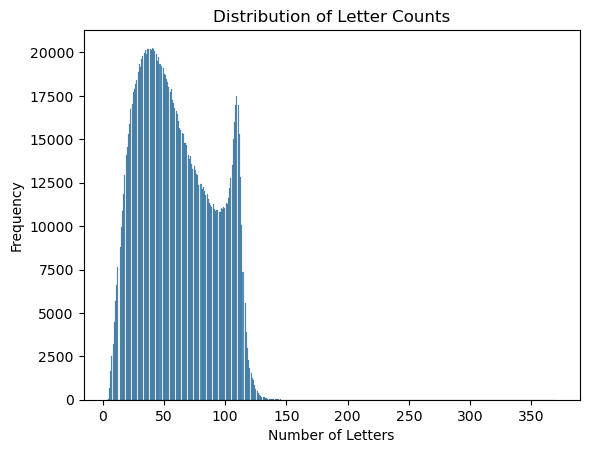

In [28]:
# Create a histogram of letter counts
sns.histplot(data['number_of_letters'])
plt.xlabel('Number of Letters')
plt.ylabel('Frequency')
plt.title('Distribution of Letter Counts')
plt.show()

### shortest and longest twitt

In [29]:
data.iloc[data['number_of_letters'].idxmin()], data.iloc[data['number_of_letters'].idxmax()]

(text                 Ugh   
 sentiment                 0
 number_of_letters         3
 Name: 310554, dtype: object,
 text                 @catfish_ohm à¹à¸à¹à¸²à¹à¸«à¹à¸?à¸²à¸£à¹...
 sentiment                                                            4
 number_of_letters                                                  371
 Name: 1295281, dtype: object)

In [30]:
data

,text,sentiment,number_of_letters
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,96
1,is upset that he can't update his Facebook by ...,0,90
2,@Kenichan I dived many times for the ball. Man...,0,71
3,my whole body feels itchy and like its on fire,0,37
4,"@nationwideclass no, it's not behaving at all....",0,90
...,...,...,...
1599995,Just woke up. Having no school is the best fee...,4,45
1599996,TheWDB.com - Very cool to hear old Walt interv...,4,67
1599997,Are you ready for your MoJo Makeover? Ask me f...,4,46
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4,53


In [31]:
data.isnull().any()

text                 False
sentiment            False
number_of_letters    False
dtype: bool

In [32]:
data.text

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: object

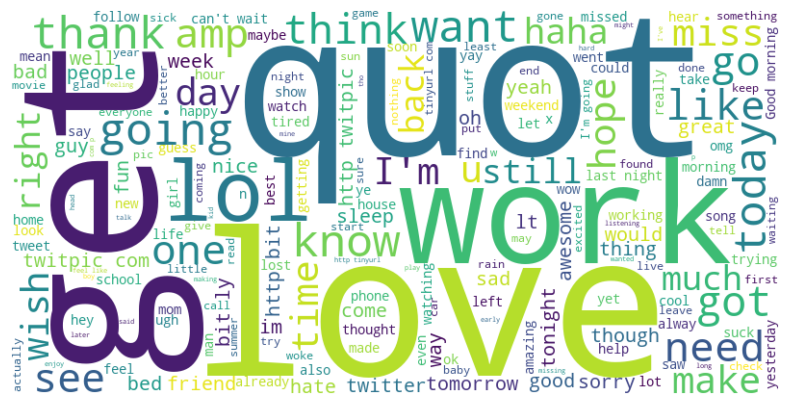

In [39]:
text = ' '.join(data['text'])

# Definiowanie słów pomocniczych, które mają zostać zignorowane
stop_words = set(stopwords.words('english'))  # Tutaj użyłem angielskich słów pomocniczych, dostosuj do potrzeb

# Tworzenie chmury słów z uwzględnieniem ignorowania słów pomocniczych
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)

# Wyświetlenie chmury słów
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
print(text[0:1000])

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah! @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds my whole body feels itchy and like its on fire  @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.  @Kwesidei not the whole crew  Need a hug  @LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ? @Tatiana_K nope they didn't have it  @twittera que me muera ?  spring break in plain city... it's snowing  I just re-pierced my ears  @caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . . @octolinz16 It it counts, idk why I did either. you never talk to me anymore  @smarrison i would've been the first, but i didn't have a gun.    not rea

In [41]:
pd.set_option('display.max_colwidth', None)

In [42]:
result_df = data[data['text'].str.contains('quot')]
result_df

,text,sentiment,number_of_letters
103,watching &quot;House&quot;,0,25
119,@eRRe_sC aaw i miss ya all too.. im leaving to BH tomorrow &quot;morning&quot; i think.. aww i wanna go to the beach w u girls!!,0,104
124,"Late night snack, glass of OJ b/c I'm &quot;down with the sickness&quot;, then back to sleep...ugh I hate getting sick...",0,102
183,Downloading NIN's new album &quot;the slip&quot; - when the hell did this come out? I'm so behind the times these days,0,98
206,My mind and body are severely protesting this &quot;getting up&quot; thing. Had nightmares to boot,0,84
...,...,...,...
1599835,@alexandervelky that's polite version - i only heard &quot;look much better on my bedroom floor&quot; how nice that you would hang it up for her,4,120
1599840,What a pretty day &quot;Just smile&quot;,4,35
1599946,@chriscuzzy someone wanted a &quot;Cuzzy&quot; memorabilia,4,53
1599977,@MayorDorisWolfe Thats my girl - dishing out the &quot;advice&quot;,4,59


# checking language

# cleaning the data

In [3]:
slang = pd.read_csv('slang.csv')

In [4]:
slang

,Unnamed: 0,acronym,expansion
0,0,2day,today
1,1,2m2h,too much too handle
2,2,2moro,tomorrow
3,3,2nite,tonight
4,4,4eae,for ever and ever
...,...,...,...
3352,3352,yw,you are welcome
3353,3353,ywca,young womens christian association
3354,3354,ywimc,your wish is my command
3355,3355,ywsyls,you win some you lose some
